# Sentiment Analysis using VADER - Part-2
* Perform sentiment Analysis on multiple reviews
* Analyze the sentiment score across multiple reviews
* How to create multiple sentiment tags using compound score

In [ ]:
import pandas as pd, numpy as np, nltk
from nltk.sentiment import SentimentIntensityAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'12CUjW29tTTxYAcPhxuKb_qSn0UTzc4BR'}) # replace the id with id of file you want to access
downloaded.GetContentFile('imdb_sentiment.csv') 

In [ ]:
data = pd.read_csv('imdb_sentiment.csv')
data.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [ ]:
analyzer = SentimentIntensityAnalyzer()
data['sentiment_score'] = data['review'].apply(lambda x : analyzer.polarity_scores(x)['compound']) # extracting 'compound' from each row by applying lambda fn using polarity_scores(x) 

In [ ]:
data

,review,sentiment,sentiment_score
0,"A very, very, very slow-moving, aimless movie ...",0,-0.4215
1,Not sure who was more lost - the flat characte...,0,-0.5507
2,Attempting artiness with black & white and cle...,0,-0.7178
3,Very little music or anything to speak of.,0,0.0000
4,The best scene in the movie was when Gerardo i...,1,0.6369
...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,-0.3382
744,"Unfortunately, any virtue in this film's produ...",0,-0.6369
745,"In a word, it is embarrassing.",0,-0.3818
746,Exceptionally bad!,0,-0.6230


In [ ]:
def get_reaction(compound_skore):
  if compound_skore < 0:
    return 'Negative'
  else:
    return 'Positive'

data['sentiment_tag'] = data['sentiment_score'].apply(lambda x : get_reaction(x))
data.head()

,review,sentiment,sentiment_score,sentiment_tag
0,"A very, very, very slow-moving, aimless movie ...",0,-0.4215,Negative
1,Not sure who was more lost - the flat characte...,0,-0.5507,Negative
2,Attempting artiness with black & white and cle...,0,-0.7178,Negative
3,Very little music or anything to speak of.,0,0.0000,Positive
4,The best scene in the movie was when Gerardo i...,1,0.6369,Positive


# Calc accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
data['sentiment_predicted'] = data['sentiment_tag'].replace({'Negative':0, 'Positive':1})
accuracy_score(data['sentiment'], data['sentiment_predicted'])

0.7767379679144385

In [ ]:
def get_reaction2(compound_skore):
  if compound_skore < 0.2:   #changing comparison value from 0 to 0.2
    return 'Negative'
  else:
    return 'Positive'


data['sentiment_tag2'] = data['sentiment_score'].apply(lambda x : get_reaction2(x))
data['sentiment_predicted2'] = data['sentiment_tag2'].replace({'Negative':0, 'Positive':1})
print(accuracy_score)
data.head()

<function accuracy_score at 0x7f033d548d08>


,review,sentiment,sentiment_score,sentiment_tag,sentiment_predicted,sentiment_tag2,sentiment_predicted2
0,"A very, very, very slow-moving, aimless movie ...",0,-0.4215,Negative,0,Negative,0
1,Not sure who was more lost - the flat characte...,0,-0.5507,Negative,0,Negative,0
2,Attempting artiness with black & white and cle...,0,-0.7178,Negative,0,Negative,0
3,Very little music or anything to speak of.,0,0.0000,Positive,1,Negative,0
4,The best scene in the movie was when Gerardo i...,1,0.6369,Positive,1,Positive,1


In [ ]:
accuracy_score(data['sentiment'], data['sentiment_predicted2']) 

0.7927807486631016

* accuracy increased

In [ ]:
wrong_predictions = data[data['sentiment_predicted2'] != data['sentiment']]
wrong_predictions.head()

,review,sentiment,sentiment_score,sentiment_tag,sentiment_predicted,sentiment_tag2,sentiment_predicted2
14,"This is a very ""right on case"" movie that deli...",1,0.0000,Positive,1,Negative,0
17,I'll put this gem up against any movie in term...,1,0.0000,Positive,1,Negative,0
19,The structure of this film is easily the most...,0,0.9992,Positive,1,Positive,1
20,This if the first movie I've given a 10 to in ...,1,0.0000,Positive,1,Negative,0
23,"Plus, it was well-paced and suited its relativ...",1,0.0000,Positive,1,Negative,0


In [ ]:
print(wrong_predictions.shape[0])

155


# Plot a histogram

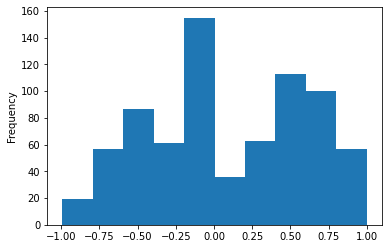

In [ ]:
data['sentiment_score'].plot.hist()

# Make multiple sentiment tags using fn

In [ ]:
def mult_sent_tags(senti_score):
  if (senti_score>=.8):
    tag = 'Very Positive'
  elif (senti_score < .8) and (senti_score>=.2):
    tag = 'Positive'
  elif (senti_score < .2) and (senti_score>=-.2):
    tag = 'Neutral'
  elif (senti_score < -.2) and (senti_score>=-.8):
    tag = 'Negative'
  else:
    tag = 'Very Negative'
  return tag



In [ ]:
senti_score = .4
mult_sent_tags(senti_score)

'Positive'

In [ ]:
data['multi_senti_tags'] = data['sentiment_score'].apply(lambda x : mult_sent_tags(x))
data

,review,sentiment,sentiment_score,sentiment_tag,sentiment_predicted,sentiment_tag2,sentiment_predicted2,multi_senti_tags
0,"A very, very, very slow-moving, aimless movie ...",0,-0.4215,Negative,0,Negative,0,Negative
1,Not sure who was more lost - the flat characte...,0,-0.5507,Negative,0,Negative,0,Negative
2,Attempting artiness with black & white and cle...,0,-0.7178,Negative,0,Negative,0,Negative
3,Very little music or anything to speak of.,0,0.0000,Positive,1,Negative,0,Neutral
4,The best scene in the movie was when Gerardo i...,1,0.6369,Positive,1,Positive,1,Positive
...,...,...,...,...,...,...,...,...
743,I just got bored watching Jessice Lange take h...,0,-0.3382,Negative,0,Negative,0,Negative
744,"Unfortunately, any virtue in this film's produ...",0,-0.6369,Negative,0,Negative,0,Negative
745,"In a word, it is embarrassing.",0,-0.3818,Negative,0,Negative,0,Negative
746,Exceptionally bad!,0,-0.6230,Negative,0,Negative,0,Negative


In [ ]:
data['multi_senti_tags'].value_counts()

Positive         282
Negative         206
Neutral          185
Very Positive     57
Very Negative     18
Name: multi_senti_tags, dtype: int64